# Key operations in Neural Networks


In NN, we specify a layer with the following statement:

`tf.keras.layers.Dense(128, activation='relu')`

This layer takes 2D tensor as input and returns another 2D tensor as an output through the following function:

`output = relu(dot(w, input)+b)`

There are three operations here:
1. Linear combination of inputs and the corresponding weights: `dot(w, input)` where `w` is a weight vector and `input` is a feature vector.
2. Add bias to the calculation `dot(w, input)+b`
3. Finally apply a non-linear activiation on the result.  Here we have used `relu` as an activation function, which returns `max(x, 0)`.



In [1]:
import numpy as np

In [9]:
weights = np.array([[1,0.5],[0.5,1]])
input_vectors = np.array([[1,1],[1,1]])
bias_unit = np.array([-2,0.5])

print('Attributes of a tensor: weights')
print('-------------------------')
print('Dimension of the tensor: ', weights.ndim)
print('Shape of the tensor: ', weights.shape)
print('Datatype of tensor: ', weights.dtype)

print()
print('Attributes of a tensor: input_vectors')
print('-------------------------')
print('Dimension of the tensor: ', input_vectors.ndim)
print('Shape of the tensor: ', input_vectors.shape)
print('Datatype of tensor: ', input_vectors.dtype)

print()
print('Attributes of a tensor: bias_unit')
print('-------------------------')
print('Dimension of the tensor: ', bias_unit.ndim)
print('Shape of the tensor: ', bias_unit.shape)
print('Datatype of tensor: ', bias_unit.dtype)

Attributes of a tensor: weights
-------------------------
Dimension of the tensor:  2
Shape of the tensor:  (2, 2)
Datatype of tensor:  float64

Attributes of a tensor: input_vectors
-------------------------
Dimension of the tensor:  2
Shape of the tensor:  (2, 2)
Datatype of tensor:  int32

Attributes of a tensor: bias_unit
-------------------------
Dimension of the tensor:  1
Shape of the tensor:  (2,)
Datatype of tensor:  float64


In [10]:
z = np.dot(weights, input_vectors) + bias_unit             # Element-wise addition

print ("==================================================")
print ("Shape of weights = ", weights.shape)
print ("Shape input_vectors = ", input_vectors.shape)
print ("Shape of bias_unit = ", bias_unit.shape)
print ("==================================================")
print ("Shape of z = ", z.shape)
print ("==================================================")
print (z)

Shape of weights =  (2, 2)
Shape input_vectors =  (2, 2)
Shape of bias_unit =  (2,)
Shape of z =  (2, 2)
[[-0.5  2. ]
 [-0.5  2. ]]


* Apply non-linear activation using 'relu':

In [11]:
output = np.maximum(0., z)                 # Element-wise relu
print ("Shape of output = ", output.shape)
print (output)

Shape of output =  (2, 2)
[[0. 2.]
 [0. 2.]]


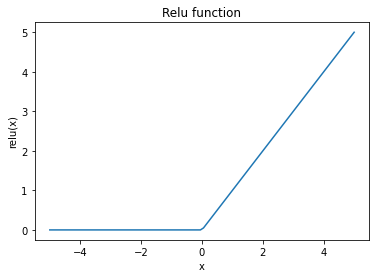

In [16]:
import matplotlib.pyplot as plt

def relu_visual(x):
    z = np.maximum(0,x)
    plt.plot(x, z)
    plt.xlabel('x')
    plt.ylabel('relu(x)')
    plt.title("Relu function")
    plt.show()
    
x = np.linspace(-5,5,100)
relu_visual(x)

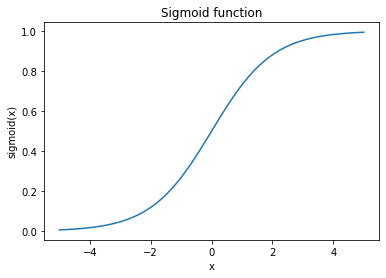

In [17]:
def sigmoid_visual(x):
    f_z = 1 / (1 + np.exp(-x))
    plt.plot(x, f_z)
    plt.xlabel('x')
    plt.ylabel('sigmoid(x)')
    plt.title("Sigmoid function")
    plt.show()
    
x = np.linspace(-5,5,100)
sigmoid_visual(x)

## Broadcasting

Employed to make two tensors involved in the operations compatible.  Concretely, let's say you want to add two tensors when their shaps differ:
1. Axes are added to the smaller tensor to match the `ndim` of the larger tensor.  These axes are called `broadcast axes`.
2. The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.


In [19]:
x_1 = np.random.rand(32, 10)
x_2 = np.random.rand(10,)

print ("Shape of x_1: ", x_1.shape)

print ("Original shape of x_2: ", x_2.shape)

# Broadcasting
# 1. Add an axis to match ndim of the larger tensor.
x_2 = np.expand_dims(x_2, axis=0)
print ("Shape of x_2 after adding a broadcast axis: ", x_2.shape)

# 2. Smaller tensor is repeated on the new axis.
x_2 = np.repeat(x_2, 32, axis=0)
print ("Shape of x_2 after broadcasting: ", x_2.shape)

Shape of x_1:  (32, 10)
Original shape of x_2:  (10,)
Shape of x_2 after adding a broadcast axis:  (1, 10)
Shape of x_2 after broadcasting:  (32, 10)


In [20]:
#numpy implements broadcasting
x_1 = np.random.rand(32, 10)
x_2 = np.random.rand(10,)
print((x_1 + x_2).shape)

(32, 10)


In [21]:
x_1 + x_2

array([[0.98772972, 0.7618611 , 0.80342368, 0.52130789, 1.03245107,
        1.57033655, 1.30439752, 0.26847432, 0.32743341, 0.95988432],
       [0.23992483, 0.75351196, 1.10206119, 0.71256667, 0.93615932,
        1.60576207, 1.27358384, 0.84108834, 0.88338349, 0.84462673],
       [0.91923532, 1.59727475, 1.42814337, 0.191729  , 0.60689248,
        1.57232404, 0.96139649, 0.81298881, 0.51368845, 0.43611741],
       [0.95642165, 1.68096063, 1.46218129, 0.8505125 , 0.65736764,
        1.61592195, 1.4705521 , 0.26317727, 0.48669758, 0.76970262],
       [0.62419328, 1.69505522, 0.97860029, 0.64393961, 0.57086383,
        1.3656705 , 1.06520657, 0.24307035, 1.14370157, 0.63448312],
       [1.07683415, 1.49368563, 1.32905038, 0.31705384, 0.26126759,
        1.5000261 , 1.00446123, 0.29832689, 0.8682611 , 0.66940507],
       [0.71945507, 1.10880208, 1.25985659, 0.82539944, 0.31927913,
        1.49957877, 0.92889021, 0.34054015, 0.37472634, 0.92836441],
       [0.64939531, 1.29318326, 1.2222459